* Project-1
* on the Loan dataset and check were you will get the best possible accuracy
* project note : Dependent Variable is Loan Status ,, SVM ,, Decision Tree,, RandomForest

1. Apply logistic Regression

In [93]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [94]:
Loan_df = pd.read_csv("Loan_Data.csv")
Loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [95]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [96]:
Loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [97]:
Loan_df.shape

(614, 13)

In [98]:
Loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [99]:
Loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
df1 = Loan_df.drop('Loan_ID',axis = 1)
df1[:2]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [101]:
df2 = df1.drop('Dependents', axis =1)

In [102]:
df2[:2]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [103]:
df2.shape ## in Df2 we drop Dependents and Loan_ID which is not usefule columns and us df 2 now onward

(614, 11)

In [104]:
df2.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
mean = df2.LoanAmount.mean()
mean

146.41216216216216

In [106]:
mean = df2.Loan_Amount_Term .mean()
mean

342.0

In [107]:
df2['LoanAmount'] = df2.LoanAmount.fillna(mean)

In [108]:
df2['Loan_Amount_Term'] = df2.Loan_Amount_Term.fillna(mean)

In [109]:
df2[:3]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,342.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [110]:
df2.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [111]:
df2 = df2.dropna()
df2[:2]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,342.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [112]:
df2.isnull().sum() ### data clean has been done now we do not have null value in data set df2

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [113]:
df2.shape

(523, 11)

In [114]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
le = LabelEncoder() ## now treat columns Gender, Married, Education, Self_Employed, Property_Area, and Loan_Status use label encoder 

In [115]:
df2.le = df2 ## where we apply LE
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['Married'] = le.fit_transform(df2['Married'])
df2['Education'] = le.fit_transform(df2['Education'])
df2['Self_Employed'] = le.fit_transform(df2['Self_Employed'])
df2['Property_Area'] = le.fit_transform(df2['Property_Area'])
df2['Loan_Status'] = le.fit_transform(df2['Loan_Status'])

In [116]:
set(df2.Education)

{0, 1}

In [117]:
set(df2.Married)

{0, 1}

In [118]:
set(df2.Property_Area)

{0, 1, 2}

In [119]:
df2.Property_Area

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 523, dtype: int32

In [120]:
df2[:6] ## for this df2 we have successfully applied LE

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,342.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# a. Apply SVM project note : Dependent Variable is Loan Status

In [121]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [122]:
#independent variable
#asarray is used to concert columns to same data type to the array 
X = np.asarray(df2[['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History','Property_Area']]) #independent variable
X[0:5]#0,1,2,3,4

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.849e+03, 0.000e+00,
        3.420e+02, 3.600e+02, 1.000e+00, 2.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.583e+03, 1.508e+03,
        1.280e+02, 3.600e+02, 1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+03, 0.000e+00,
        6.600e+01, 3.600e+02, 1.000e+00, 2.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.583e+03, 2.358e+03,
        1.200e+02, 3.600e+02, 1.000e+00, 2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+03, 0.000e+00,
        1.410e+02, 3.600e+02, 1.000e+00, 2.000e+00]])

In [123]:
#dependent variable
y = np.asarray(df2['Loan_Status']) #dependent variable
y [0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (444, 10) (444,)
Test set: (79, 10) (79,)


In [125]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) # question and answers

SVC()

In [126]:
yhat_best_prediction = clf.predict(X_test) #question 
yhat_best_prediction [0:5]

array([1, 1, 1, 1, 1])

In [127]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_best_prediction, average='weighted') 

0.565337394118207

In [128]:
# write your code here
    
clf2 = svm.SVC(kernel='poly')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average="weighted"))

Avg F1-score: 0.5653


# b. Apply logistic Regression 

In [129]:
import pandas as pd   #Lets first import required libraries:
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt  

In [130]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[ 0.46505814, -1.35734716, -0.52794754, -0.39955629,  0.09974556,
        -0.61299359,  2.20915186,  0.27688481,  0.44052687,  1.22717243],
       [ 0.46505814,  0.7367312 , -0.52794754, -0.39955629, -0.13007349,
        -0.01874985, -0.26932343,  0.27688481,  0.44052687, -1.32476069],
       [ 0.46505814,  0.7367312 , -0.52794754,  2.50277624, -0.41743807,
        -0.61299359, -0.98738636,  0.27688481,  0.44052687,  1.22717243],
       [ 0.46505814,  0.7367312 ,  1.89412758, -0.39955629, -0.49313676,
         0.31620186, -0.36197671,  0.27688481,  0.44052687,  1.22717243],
       [ 0.46505814, -1.35734716, -0.52794754, -0.39955629,  0.12715684,
        -0.61299359, -0.11876184,  0.27688481,  0.44052687,  1.22717243]])

In [131]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100) #trainingsize = 80% test = 20%
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (418, 10) (418,)
Test set: (105, 10) (105,)


In [132]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga')
LR.fit(X_train,y_train) #training 
LR

LogisticRegression(solver='saga')

In [133]:
yhat = LR.predict(X_test)#only questions passed and answers are saved for evaluation
yhat[:5]

array([1, 1, 1, 1, 1])

In [134]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.41915774, 0.58084226],
       [0.11035693, 0.88964307],
       [0.12560888, 0.87439112],
       [0.23968174, 0.76031826],
       [0.16120403, 0.83879597]])

In [135]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat) #actualvale,predvalue

0.8846153846153846

# c. Apply Decision Tree

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [137]:
print("training data ",X_train.shape,y_train.shape)
print("testing data ",X_test.shape,y_test.shape)

training data  (418, 10) (418,)
testing data  (105, 10) (105,)


In [138]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion= 'entropy')
dtc

DecisionTreeClassifier(criterion='entropy')

In [139]:
dtc.fit(X_train,y_train)   #Training 

DecisionTreeClassifier(criterion='entropy')

In [140]:
y_hat = dtc.predict(X_test) #y_hat are my predicted answers
y_hat

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [141]:
from sklearn import metrics
print(f"my accuracy is {metrics.accuracy_score(y_test,y_hat)}")

my accuracy is 0.7142857142857143


# d. Apply RandomForest

In [142]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =50)

In [143]:
X_train.shape

(392, 10)

In [144]:
X_test.shape

(131, 10)

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [146]:
X_train[:3]

array([[ 0.45404168, -1.39548143, -0.51431132,  2.55704156, -0.02701186,
        -0.61431788, -0.31747897,  0.28071748,  0.45812285, -0.05903321],
       [-2.20244098,  0.71659857, -0.51431132, -0.39107694, -0.52758538,
         1.10733441, -0.63617744,  0.28071748,  0.45812285, -0.05903321],
       [ 0.45404168,  0.71659857, -0.51431132, -0.39107694, -0.39167508,
        -0.07702114, -0.48821029,  0.28071748,  0.45812285,  1.22657897]])

In [147]:
X_test[:3]

array([[ 0.45404168, -1.39548143,  1.94434766, -0.39107694, -0.68432349,
        -0.61431788, -1.37601319,  0.28071748,  0.45812285,  1.22657897],
       [ 0.45404168,  0.71659857, -0.51431132, -0.39107694, -0.17404209,
         0.32633521, -0.52235656,  0.28071748,  0.45812285,  1.22657897],
       [ 0.45404168,  0.71659857, -0.51431132, -0.39107694,  0.53216195,
        -0.61431788,  0.04674786,  0.28071748,  0.45812285, -0.05903321]])

In [148]:
# Fitting the classifier into the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
classifier.fit(X_train,y_train)#question,answers 

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [149]:
Y_Pred = classifier.predict(X_test)#examination only question are given # Predicting the test set results

In [150]:
from sklearn.metrics import f1_score
f1_score(y_test,Y_Pred)#actual,predict

0.8297872340425533

# Project-2

* Apply Exploratory Data Analysis on the FifaDataset
* Convert the appropriate columns to machine understandable columns using label encoding
* Handle Null values

In [151]:
import pandas as pd  # data analysis
import numpy as np
# data visulation
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [152]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
fifa = pd.read_csv('Fifa_Cleaned.csv',index_col=0) ## 1st columns treat as index colunm

fifa.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,Messi,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,Lean,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,Normal,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,Normal,105400000.0,Napoli,82.0,LS,24.0,2010-07-01,2022,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,"#Speedster,#Dribbler,#Crosser,#Acrobat","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,Normal,106500000.0,Napoli,82.0,LCB,26.0,2014-07-01,2021,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,"#Tackling ,#Tactician ,#Strength,#Complete Def...",Power Header,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [153]:
fifa.shape

(17954, 91)

In [154]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17954 entries, 158023 to 247187
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non

In [155]:
fifa.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate', 'body_type',
       'release_clause_euro', 'club_team', 'club_rating', 'club_position',
       'club_jersey_number', 'club_join_date', 'contract_end_year',
       'national_team', 'national_rating', 'national_team_position',
       'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_divi

In [156]:
fifa.drop(['name','full_name','nationality','positions','club_position','club_team','overall_rating','potential','national_jersey_number','body_type','national_team_position','tags','traits'], axis=1,inplace=True)

In [157]:
fifa[:3]

,birth_date,age,height_cm,weight_kgs,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,release_clause_euro,club_rating,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,1987-06-24,31,170.18,72.1,110500000.0,565000.0,Left,5,4,4,Medium/ Low,226500000.0,86.0,10.0,2004-07-01,2021,Argentina,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
190460,1992-02-14,27,154.94,76.2,69500000.0,205000.0,Right,3,5,4,High/ Medium,133800000.0,83.0,23.0,2013-08-30,2020,Denmark,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
195864,1993-03-15,25,190.50,83.9,73000000.0,255000.0,Right,4,4,5,High/ Medium,144200000.0,82.0,6.0,2016-08-09,2021,France,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3


In [158]:
fifa.shape  # 91 - 80 = 11 drop 11 number of columns which is not use

(17954, 78)

In [159]:
fifa.isnull().sum()# Data Cleaning fil the numric value by using mean()

birth_date       0
age              0
height_cm        0
weight_kgs       0
value_euro     255
              ... 
LB            2065
LCB           2065
CB            2065
RCB           2065
RB            2065
Length: 78, dtype: int64

In [160]:
fifa['international_reputation(1-5)'].fillna(fifa['international_reputation(1-5)'].mean(), inplace = True) # skill_moves(1-5)
fifa['skill_moves(1-5)'].fillna(fifa['skill_moves(1-5)'].mean(), inplace = True)
fifa['weak_foot(1-5)'].fillna(fifa['weak_foot(1-5)'].mean(), inplace = True)
fifa['crossing'].fillna(fifa['crossing'].mean(), inplace = True)
fifa['club_rating'].fillna(fifa['club_rating'].mean(), inplace = True)
fifa['finishing'].fillna(fifa['finishing'].mean(), inplace = True)
fifa['heading_accuracy'].fillna(fifa['heading_accuracy'].mean(), inplace = True)
fifa['short_passing'].fillna(fifa['short_passing'].mean(), inplace = True)
fifa['volleys'].fillna(fifa['volleys'].mean(), inplace = True)
fifa['dribbling'].fillna(fifa['dribbling'].mean(), inplace = True)
fifa['curve'].fillna(fifa['curve'].mean(), inplace = True)
fifa['freekick_accuracy'].fillna(fifa['freekick_accuracy'].mean(), inplace = True)
fifa['long_passing'].fillna(fifa['long_passing'].mean(), inplace = True)
fifa['ball_control'].fillna(fifa['ball_control'].mean(), inplace = True)
fifa['acceleration'].fillna(fifa['acceleration'].mean(), inplace = True)
fifa['sprint_speed'].fillna(fifa['sprint_speed'].mean(), inplace = True)
fifa['agility'].fillna(fifa['agility'].mean(), inplace = True)
fifa['reactions'].fillna(fifa['reactions'].mean(), inplace = True)
fifa['balance'].fillna(fifa['balance'].mean(), inplace = True)
fifa['shot_power'].fillna(fifa['shot_power'].mean(), inplace = True)
fifa['jumping'].fillna(fifa['jumping'].mean(), inplace = True)
fifa['stamina'].fillna(fifa['stamina'].mean(), inplace = True)
fifa['strength'].fillna(fifa['strength'].mean(), inplace = True)
fifa['long_shots'].fillna(fifa['long_shots'].mean(), inplace = True)
fifa['aggression'].fillna(fifa['aggression'].mean(), inplace = True)
fifa['interceptions'].fillna(fifa['interceptions'].mean(), inplace = True)
fifa['positioning'].fillna(fifa['positioning'].mean(), inplace = True)
fifa['vision'].fillna(fifa['vision'].mean(), inplace = True)
fifa['penalties'].fillna(fifa['penalties'].mean(), inplace = True)
fifa['composure'].fillna(fifa['composure'].mean(), inplace = True)
fifa['marking'].fillna(fifa['marking'].mean(), inplace = True)
fifa['standing_tackle'].fillna(fifa['standing_tackle'].mean(), inplace = True)
fifa['sliding_tackle'].fillna(fifa['sliding_tackle'].mean(), inplace = True)
fifa['GK_diving'].fillna(fifa['GK_diving'].mean(), inplace = True)
fifa['GK_handling'].fillna(fifa['GK_handling'].mean(), inplace = True)
fifa['GK_kicking'].fillna(fifa['GK_kicking'].mean(), inplace = True)
fifa['GK_positioning'].fillna(fifa['GK_positioning'].mean(), inplace = True)
fifa['GK_reflexes'].fillna(fifa['GK_reflexes'].mean(), inplace = True)
fifa['value_euro'].fillna(fifa['value_euro'].mean(), inplace = True)
fifa['wage_euro'].fillna(fifa['wage_euro'].mean(), inplace = True)
fifa['release_clause_euro'].fillna(fifa['release_clause_euro'].mean(), inplace = True)

In [161]:
#Joined Column
def clean_date(x):
    l=[]
    if isinstance(x,str):
        l=x.split(", ")
        x=l[-1]
    return(x)

fifa['club_join_date']=fifa['club_join_date'].replace(np.nan,0)
fifa['club_join_date'] = fifa['club_join_date'].apply(clean_date).astype('str')

In [162]:
#Contract Valid Until Column
import datetime
fifa['contract_end_year']=pd.to_datetime(fifa['contract_end_year'])
fifa['year'] = pd.DatetimeIndex(fifa['contract_end_year']).year.astype(str)
fifa['contract_end_year'].fillna('Not available', inplace = True) 

In [163]:
# we have hight in cm and weight in Kg so need  to change for it even we do not have any null value in hight and weight columns

In [164]:
#Work Rate Column
fifa['work_rate'].value_counts()

Medium/ Medium    9690
High/ Medium      3093
Medium/ High      1681
High/ High         934
Medium/ Low        905
High/ Low          673
Low/ Medium        522
Low/ High          422
Low/ Low            34
Name: work_rate, dtype: int64

In [165]:
# we have Medium/ Medium    9690 by maxmum number so we will fill that by Medium/ Medium only and fill the gap 

In [166]:
fifa['work_rate'].fillna('Medium/ Medium', inplace = True)

In [167]:
#Preferred Foot column
fifa['preferred_foot'].value_counts()

Right    13781
Left      4173
Name: preferred_foot, dtype: int64

In [168]:
fifa['preferred_foot'].fillna('Right', inplace = True)

In [169]:
#Function to convert skill rating at each position. #Skill Columns
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val

skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM','RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
                 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [170]:
for col in skill_columns:
    fifa[col] = fifa[col].apply(skillConverter)
    fifa[col].fillna(0.0, inplace = True)

In [171]:
# treat by using LE - preferred_foot, work_rate
set(fifa.preferred_foot)

{'Left', 'Right'}

In [172]:
set(fifa.work_rate)

{'High/ High',
 'High/ Low',
 'High/ Medium',
 'Low/ High',
 'Low/ Low',
 'Low/ Medium',
 'Medium/ High',
 'Medium/ Low',
 'Medium/ Medium'}

In [173]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
le = LabelEncoder() 

In [174]:
fifa.le = fifa
fifa['preferred_foot'] = le.fit_transform(fifa['preferred_foot'])
set(fifa.preferred_foot)

{0, 1}

In [175]:
fifa['work_rate'] = le.fit_transform(fifa['work_rate'])
set(fifa.work_rate)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [176]:
fifa[:5]

,birth_date,age,height_cm,weight_kgs,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,release_clause_euro,club_rating,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,1987-06-24,31,170.18,72.1,110500000.0,565000.0,0,5,4,4,7,226500000.0,86.0,10.0,2004-07-01,2021-01-01 00:00:00,Argentina,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,93.0,87.0,87.0,87.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0,2021.0
190460,1992-02-14,27,154.94,76.2,69500000.0,205000.0,1,3,5,4,2,133800000.0,83.0,23.0,2013-08-30,2020-01-01 00:00:00,Denmark,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,82.0,82.0,82.0,88.0,87.0,87.0,87.0,88.0,89.0,89.0,89.0,89.0,88.0,88.0,88.0,89.0,74.0,74.0,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0,2020.0
195864,1993-03-15,25,190.50,83.9,73000000.0,255000.0,1,4,4,5,2,144200000.0,82.0,6.0,2016-08-09,2021-01-01 00:00:00,France,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,84.0,84.0,84.0,85.0,86.0,86.0,86.0,85.0,87.0,87.0,87.0,86.0,87.0,87.0,87.0,86.0,79.0,80.0,80.0,80.0,79.0,77.0,75.0,75.0,75.0,77.0,2021.0
198219,1991-06-04,27,162.56,59.0,62000000.0,165000.0,1,3,4,4,2,105400000.0,82.0,24.0,2010-07-01,2022-01-01 00:00:00,Italy,83.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,81.0,81.0,81.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,81.0,81.0,81.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,47.0,47.0,47.0,61.0,2022.0
201024,1991-06-20,27,187.96,88.9,60000000.0,135000.0,1,3,3,2,0,106500000.0,82.0,26.0,2014-07-01,2021-01-01 00:00:00,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,56.0,56.0,56.0,56.0,57.0,57.0,57.0,56.0,58.0,58.0,58.0,60.0,64.0,64.0,64.0,60.0,76.0,80.0,80.0,80.0,76.0,79.0,88.0,88.0,88.0,79.0,2021.0


In [177]:
fifa.isnull().sum() # now we do not have any null value above DF we hav clean sucessfully 

birth_date    0
age           0
height_cm     0
weight_kgs    0
value_euro    0
             ..
LCB           0
CB            0
RCB           0
RB            0
year          0
Length: 79, dtype: int64

  # d. Apply the correlation and remove the column which are more than 60%    correlated

In [178]:
corr = fifa.corr()
corr

,age,height_cm,weight_kgs,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,release_clause_euro,club_rating,club_jersey_number,national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
age,1.000000,0.059579,0.233819,0.081621,0.151531,0.002259,0.259977,0.061108,0.029681,-0.090472,0.061620,0.022906,-0.241511,0.026075,0.133357,0.074761,0.151723,0.137151,0.147752,0.016334,0.147628,0.196003,0.185018,0.091552,-0.151665,-0.144265,-0.013177,0.463421,-0.083610,0.158875,0.183816,0.103804,0.339671,0.164655,0.264859,0.198131,0.085510,0.193201,0.147924,0.394717,0.146725,0.118362,0.103008,0.100785,0.105334,0.104697,0.115960,0.102587,0.050275,0.050275,0.050275,0.021673,0.034337,0.034337,0.034337,0.021673,0.036955,0.036955,0.036955,0.025522,0.071671,0.071671,0.071671,0.025522,0.062369,0.098114,0.098114,0.098114,0.062369,0.064458,0.103794,0.103794,0.103794,0.064458
height_cm,0.059579,1.000000,0.495320,0.011070,0.021136,0.050176,0.026850,-0.130464,-0.320141,0.139972,0.010851,0.034736,-0.025676,0.090491,-0.388805,-0.296794,-0.043058,-0.290321,-0.279702,-0.382181,-0.345927,-0.316407,-0.262813,-0.328643,-0.406415,-0.350074,-0.438373,-0.020000,-0.532396,-0.239960,-0.052169,-0.254794,0.318769,-0.305601,-0.073996,-0.078730,-0.353380,-0.287254,-0.272134,-0.111849,-0.089783,-0.081452,-0.086093,0.295386,0.296296,0.291707,0.296131,0.296989,-0.320455,-0.320455,-0.320455,-0.372204,-0.353679,-0.353679,-0.353679,-0.372204,-0.359604,-0.359604,-0.359604,-0.366506,-0.329755,-0.329755,-0.329755,-0.366506,-0.292732,-0.246577,-0.246577,-0.246577,-0.292732,-0.267152,-0.178875,-0.178875,-0.178875,-0.267152
weight_kgs,0.233819,0.495320,1.000000,0.044217,0.061651,0.072883,0.085086,-0.128875,-0.353601,0.129429,0.035293,0.063203,-0.084709,0.066107,-0.394145,-0.294710,0.027698,-0.291826,-0.263662,-0.414172,-0.347161,-0.305299,-0.260840,-0.339170,-0.481583,-0.413238,-0.533050,0.082796,-0.663188,-0.198428,0.005741,-0.232554,0.610431,-0.278552,0.021926,-0.034607,-0.355281,-0.282234,-0.251453,-0.044538,-0.057559,-0.056318,-0.065965,0.342368,0.341784,0.339684,0.343853,0.343440,-0.321523,-0.321523,-0.321523,-0.398515,-0.372251,-0.372251,-0.372251,-0.398515,-0.382837,-0.382837,-0.382837,-0.391367,-0.341729,-0.341729,-0.341729,-0.391367,-0.299433,-0.237121,-0.237121,-0.237121,-0.299433,-0.269419,-0.150195,-0.150195,-0.150195,-0.269419
value_euro,0.081621,0.011070,0.044217,1.000000,0.856437,-0.017019,0.641445,0.166493,0.314991,-0.162339,0.972439,0.537066,-0.086688,0.586039,0.249049,0.258899,0.186597,0.326438,0.289095,0.270786,0.287231,0.266256,0.304259,0.306871,0.173386,0.175464,0.197489,0.544500,0.118072,0.282233,0.127714,0.214673,0.137175,0.281841,0.187520,0.141311,0.260548,0.359865,0.241484,0.452924,0.136905,0.109565,0.089722,-0.028683,-0.028848,-0.029894,-0.027642,-0.028398,0.233365,0.233365,0.233365,0.232993,0.240441,0.240441,0.240441,0.232993,0.241425,0.241425,0.241425,0.230960,0.241071,0.241071,0.241071,0.230960,0.191101,0.193853,0.193853,0.193853,0.191101,0.177827,0.153941,0.153941,0.153941,0.177827
wage_euro,0.151531,0.021136,0.061651,0.856437,1.000000,-0.016592,0.665963,0.145008,0.267524,-0.145684,0.827324,0.544889,-0.082568,0.529775,0.237044,0.223219,0.191984,0.300251,0.262473,0.240078,0.264880,0.242763,0.283542,0.280224,0.130116,0.134733,0.162141,0.502348,0.094709,0.263211,0.133955,0.184014,0.146471,0.255130,0.199063,0.158999,0.231743,0.322490,0.228778,0.425333,0.149748,0.127565,0.113144,-0.029663,-0.029062,-0.031194,-0.028928,-0.029787,0.212298,0.212298,0.212298,0.209150,0.216390,0.216390,0

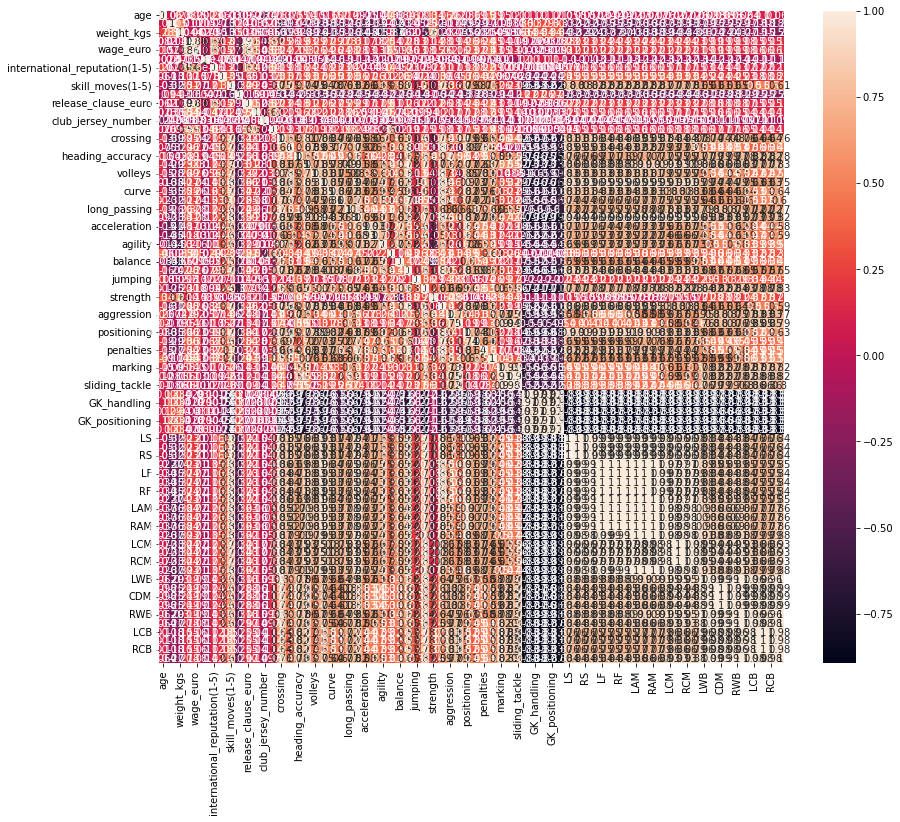

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True)
plt.show()

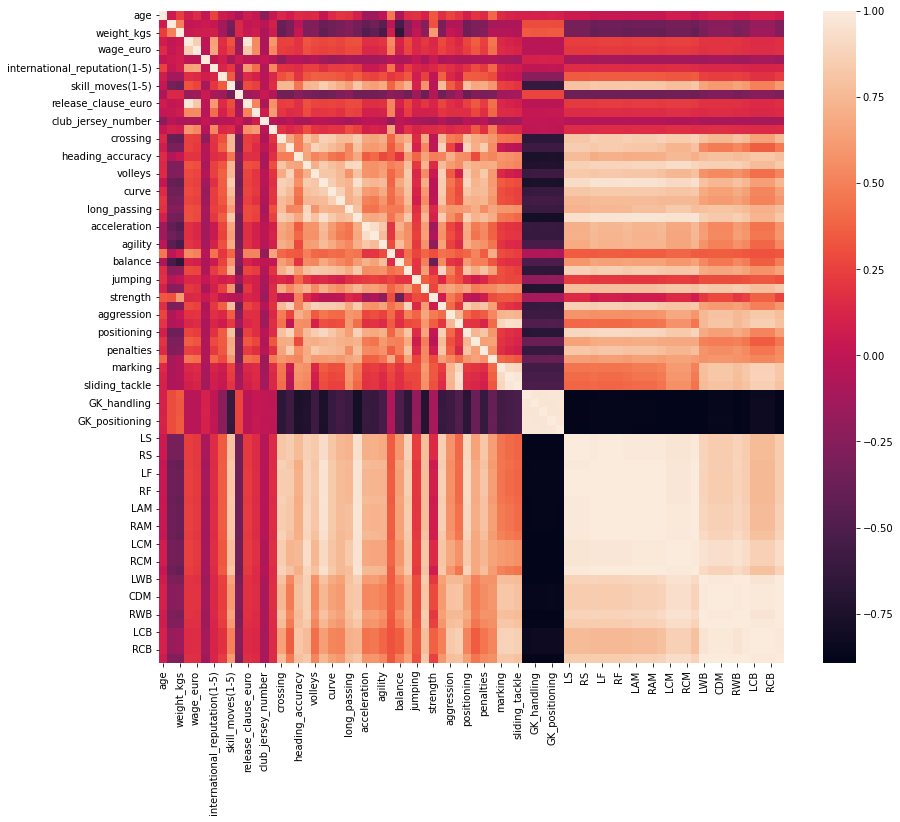

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(corr,)
plt.show()

In [181]:
for i in range(len(corr)):
    for j in range(i):
        if corr.iloc[i][j] > 0.6:
            print(corr.iloc[i][j])

0.8564371463833301
0.6414453942245042
0.6659633279382751
0.9724392513915419
0.8273236624967052
0.6051023219380619
0.6158427021495063
0.7464664003511047
0.7484922900975466
0.6641825951455494
0.7355436396634722
0.812404450208049
0.6718369583934244
0.6536214138990123
0.7492295834896452
0.6965110230042353
0.8864689170812116
0.7050007291955909
0.84182734083099
0.8609118638514924
0.8277433089925811
0.8492648917999117
0.8121116741214758
0.7756658227975481
0.83778599442169
0.7656688765932053
0.7794679682581339
0.8107720905520008
0.8461356876324607
0.7048324231141543
0.7644981558161371
0.7048280937623532
0.7393378499061521
0.7541544849394016
0.7571839259779314
0.862054392081333
0.6292978590258912
0.7600857488328282
0.8987303449929749
0.7298700367109223
0.7163587458059052
0.7075055690285168
0.8212683655450733
0.8452109702078249
0.7945573615812137
0.6693299319064966
0.9149220543378187
0.7990520836046107
0.9415561547953384
0.8337814762073363
0.7639648518842052
0.7959586129604992
0.6605875914697552

In [182]:
st2 = set()
for i in range(len(corr)):
    for j in range(i):
        if abs(corr.iloc[i][j]) > 0.2:
            st2.add(corr.columns[i])

In [183]:
len(st2)

69

In [184]:
st2

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK_diving',
 'GK_handling',
 'GK_kicking',
 'GK_positioning',
 'GK_reflexes',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST',
 'acceleration',
 'aggression',
 'agility',
 'balance',
 'ball_control',
 'club_jersey_number',
 'club_rating',
 'composure',
 'crossing',
 'curve',
 'dribbling',
 'finishing',
 'freekick_accuracy',
 'heading_accuracy',
 'interceptions',
 'international_reputation(1-5)',
 'jumping',
 'long_passing',
 'long_shots',
 'marking',
 'national_rating',
 'penalties',
 'positioning',
 'reactions',
 'release_clause_euro',
 'short_passing',
 'shot_power',
 'skill_moves(1-5)',
 'sliding_tackle',
 'sprint_speed',
 'stamina',
 'standing_tackle',
 'strength',
 'vision',
 'volleys',
 'wage_euro',
 'weight_kgs',
 'work_rate'}

In [185]:
Fifa_new = fifa.drop(st2, axis = 1)
Fifa_new  ## in Fifa _new we have only 10 important column by using using correlation

,birth_date,age,height_cm,value_euro,preferred_foot,weak_foot(1-5),club_join_date,contract_end_year,national_team,year
id,,,,,,,,,,
158023,1987-06-24,31,170.18,110500000.0,0,4,2004-07-01,2021-01-01 00:00:00,Argentina,2021.0
190460,1992-02-14,27,154.94,69500000.0,1,5,2013-08-30,2020-01-01 00:00:00,Denmark,2020.0
195864,1993-03-15,25,190.50,73000000.0,1,4,2016-08-09,2021-01-01 00:00:00,France,2021.0
198219,1991-06-04,27,162.56,62000000.0,1,4,2010-07-01,2022-01-01 00:00:00,Italy,2022.0
201024,1991-06-20,27,187.96,60000000.0,1,3,2014-07-01,2021-01-01 00:00:00,NaN,2021.0
...,...,...,...,...,...,...,...,...,...,...
204322,1993-10-07,25,175.26,975000.0,1,3,2010-01-01,2020-01-01 00:00:00,NaN,2020.0
239762,1996-02-02,23,182.88,190000.0,0,3,2017-07-07,2023-01-01 00:00:00,NaN,2023.0
235155,1996-04-09,22,185.42,170000.0,1,1,2016-07-01,2019-01-01 00:00:00,NaN,2019.0


#  e. Apply the variance and remove the columns whose variance is less that   20%

In [186]:
fifa.head()

,birth_date,age,height_cm,weight_kgs,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,release_clause_euro,club_rating,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,1987-06-24,31,170.18,72.1,110500000.0,565000.0,0,5,4,4,7,226500000.0,86.0,10.0,2004-07-01,2021-01-01 00:00:00,Argentina,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,93.0,87.0,87.0,87.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0,2021.0
190460,1992-02-14,27,154.94,76.2,69500000.0,205000.0,1,3,5,4,2,133800000.0,83.0,23.0,2013-08-30,2020-01-01 00:00:00,Denmark,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,82.0,82.0,82.0,88.0,87.0,87.0,87.0,88.0,89.0,89.0,89.0,89.0,88.0,88.0,88.0,89.0,74.0,74.0,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0,2020.0
195864,1993-03-15,25,190.50,83.9,73000000.0,255000.0,1,4,4,5,2,144200000.0,82.0,6.0,2016-08-09,2021-01-01 00:00:00,France,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,84.0,84.0,84.0,85.0,86.0,86.0,86.0,85.0,87.0,87.0,87.0,86.0,87.0,87.0,87.0,86.0,79.0,80.0,80.0,80.0,79.0,77.0,75.0,75.0,75.0,77.0,2021.0
198219,1991-06-04,27,162.56,59.0,62000000.0,165000.0,1,3,4,4,2,105400000.0,82.0,24.0,2010-07-01,2022-01-01 00:00:00,Italy,83.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,81.0,81.0,81.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,81.0,81.0,81.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,47.0,47.0,47.0,61.0,2022.0
201024,1991-06-20,27,187.96,88.9,60000000.0,135000.0,1,3,3,2,0,106500000.0,82.0,26.0,2014-07-01,2021-01-01 00:00:00,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,56.0,56.0,56.0,56.0,57.0,57.0,57.0,56.0,58.0,58.0,58.0,60.0,64.0,64.0,64.0,60.0,76.0,80.0,80.0,80.0,76.0,79.0,88.0,88.0,88.0,79.0,2021.0


In [187]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0.2) #the column having variance less than the 0.2 will not be slected

In [188]:
fifa.drop(['birth_date','club_join_date','contract_end_year', 'national_team'], axis=1,inplace=True)

In [189]:
var.fit(fifa) ## lets train the fifa dataframe im drop the date column as they give us error

VarianceThreshold(threshold=0.2)

In [190]:
var.get_support()

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [191]:
fifa.columns

Index(['age', 'height_cm', 'weight_kgs', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'work_rate', 'release_clause_euro', 'club_rating',
       'club_jersey_number', 'national_rating', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standing_tackle', 'sliding_tackle', 'GK_diving',
       'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'year'],
 

In [192]:
fifa.columns[var.get_support()]

Index(['age', 'height_cm', 'weight_kgs', 'value_euro', 'wage_euro',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate',
       'release_clause_euro', 'club_rating', 'club_jersey_number',
       'national_rating', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF',
       'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB',
       'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'year'],
      dtype='object')

In [193]:
fifa.columns[var.get_support() == False]

Index(['preferred_foot', 'international_reputation(1-5)'], dtype='object')

In [194]:
names_of_not_useful_columns = fifa.columns[var.get_support() == False]

In [195]:
names_of_not_useful_columns

Index(['preferred_foot', 'international_reputation(1-5)'], dtype='object')

In [196]:
fifa.drop(names_of_not_useful_columns,axis = 1,inplace = True)

In [197]:
fifa  ## by aplying variance and remove the columns whose variance is less that 20% we get the 73 columns only 

,age,height_cm,weight_kgs,value_euro,wage_euro,weak_foot(1-5),skill_moves(1-5),work_rate,release_clause_euro,club_rating,club_jersey_number,national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,31,170.18,72.1,110500000.0,565000.0,4,4,7,226500000.0,86.0,10.0,82.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,93.0,87.0,87.0,87.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,50.0,50.0,50.0,61.0,2021.0
190460,27,154.94,76.2,69500000.0,205000.0,5,4,2,133800000.0,83.0,23.0,78.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,82.0,82.0,82.0,88.0,87.0,87.0,87.0,88.0,89.0,89.0,89.0,89.0,88.0,88.0,88.0,89.0,74.0,74.0,74.0,74.0,74.0,69.0,60.0,60.0,60.0,69.0,2020.0
195864,25,190.50,83.9,73000000.0,255000.0,4,5,2,144200000.0,82.0,6.0,84.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,84.0,84.0,84.0,85.0,86.0,86.0,86.0,85.0,87.0,87.0,87.0,86.0,87.0,87.0,87.0,86.0,79.0,80.0,80.0,80.0,79.0,77.0,75.0,75.0,75.0,77.0,2021.0
198219,27,162.56,59.0,62000000.0,165000.0,4,4,2,105400000.0,82.0,24.0,83.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,81.0,81.0,81.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,81.0,81.0,81.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,47.0,47.0,47.0,61.0,2022.0
201024,27,187.96,88.9,60000000.0,135000.0,3,2,0,106500000.0,82.0,26.0,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,56.0,56.0,56.0,56.0,57.0,57.0,57.0,56.0,58.0,58.0,58.0,60.0,64.0,64.0,64.0,60.0,76.0,80.0,80.0,80.0,76.0,79.0,88.0,88.0,88.0,79.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,25,175.26,74.8,975000.0,3000.0,3,3,2,1800000.0,67.0,7.0,NaN,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,20,18,15,11,15,12,7,64.0,64.0,64.0,68.0,66.0,66.0,66.0,68.0,67.0,67.0,67.0,68.0,62.0,62.0,62.0,68.0,55.0,54.0,54.0,54.0,55.0,52.0,48.0,48.0,48.0,52.0,2020.0
239762,23,182.88,79.8,190000.0,1000.0,3,2,6,295000.0,65.0,3.0,NaN,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,64,60,15,7,7,15,8,45.0,45.0,45.0,49.0,47.0,47.0,47.0,49.0,48.0,48.0,48.0,52.0,50.0,50.0,50.0,52.0,59.0,57.0,57.0,57.0,59.0,59.0,60.0,60.0,60.0,59.0,2023.0
235155,22,185.42,89.8,170000.0,1000.0,1,1,8,289000.0,69.0,31.0,NaN,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,12,13,63,57,50,58,63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0
